In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.ar_model import AR
import copy

In [7]:
#question1
snp = pd.read_csv('snp_500_2015_2019.csv') 
snp.set_index(['Date'], inplace=True)
snp_close = snp['Close'].to_frame().apply(np.log)
temp_snp_close = snp_close.reset_index()

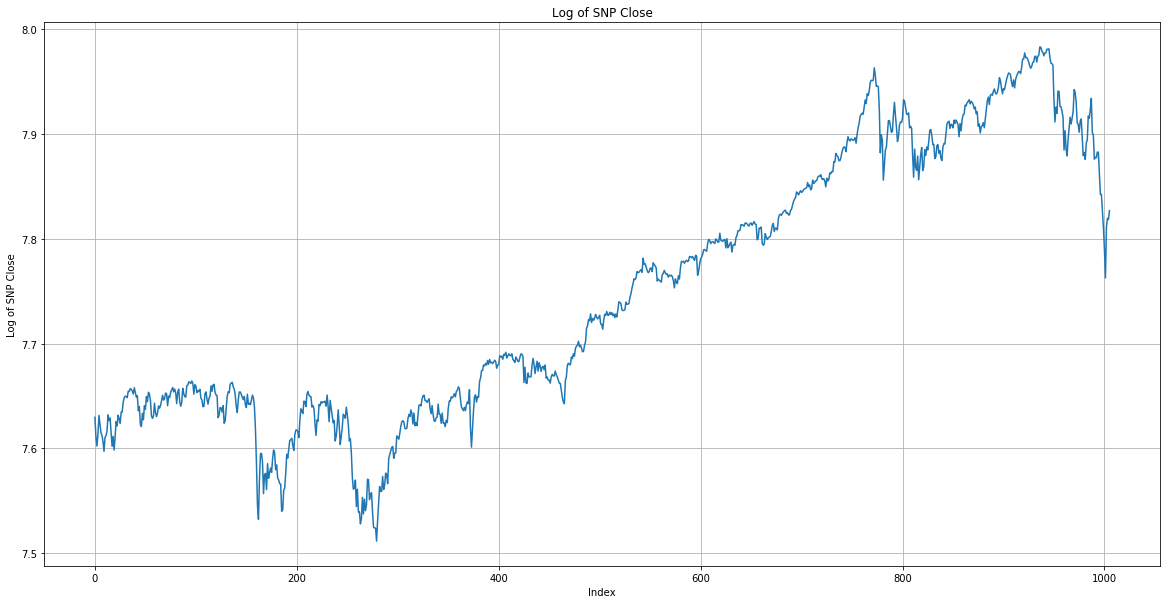

In [41]:
plt.figure(figsize=(20,10))
plt.plot(temp_snp_close["Close"])  
plt.title("Log of SNP Close")  
plt.xlabel("Index")  
plt.ylabel("Log of SNP Close")  
plt.grid()
plt.show()

In [ ]:
def stationarity_test(timeseries, info = False):
    '''Augmented Dickey-Fuller test for stationarity'''
    from statsmodels.tsa.stattools import adfuller
    df_test = adfuller(timeseries, autolag = "AIC")
    df_list = [df_test[0],df_test[1]<0.05,df_test[1],df_test[2],df_test[3]]
    df_output = pd.Series(df_list, index = ["Test Statistic", 
                                              "Stationarity",
                                              "p-value", 
                                              "Number of Lags Used",
                                              "Number of Observations Used"
                                             ])
    
    if(info):
        print("Results of Dickey-Fuller Test:")
        print(df_output)
        
    return df_output

In [42]:
stationarity_test(snp_close["Close"])

Test Statistic                 -1.21388
Stationarity                      False
p-value                        0.667598
Number of Lags Used                   0
Number of Observations Used        1005
dtype: object

In [49]:
#question2
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
snp_arma['Res'] = ARIMA(snp_arma, order=(1,0,0)).fit().resid 
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']

temp_true = snp_arma["True"].reset_index()["True"]
temp_prediction = snp_arma["Prediction"].reset_index()["Prediction"]

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


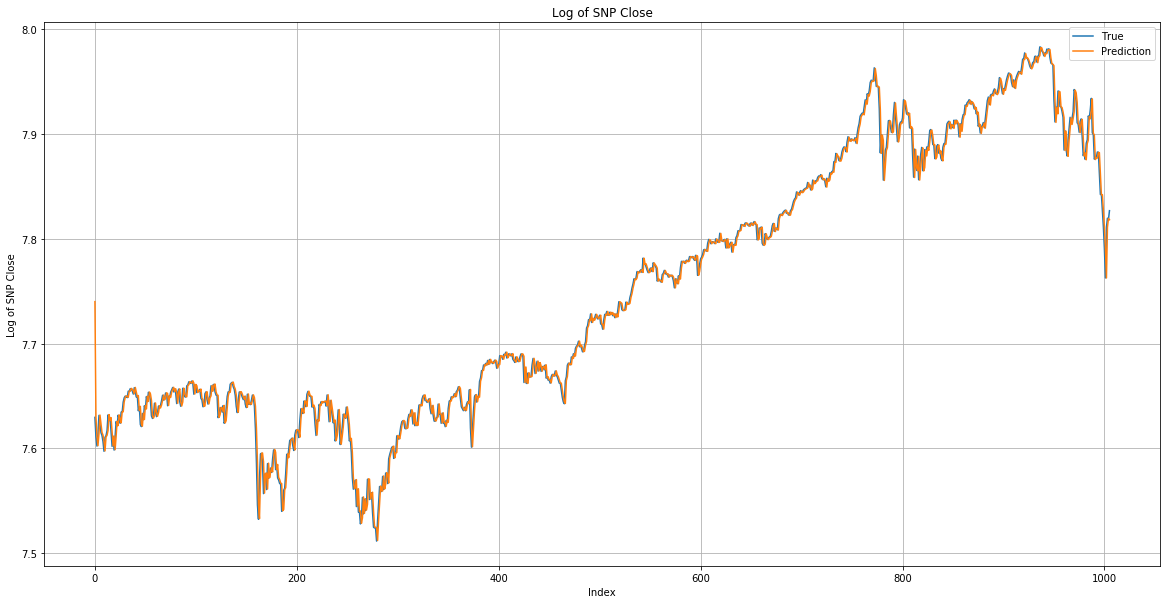

In [52]:
plt.figure(figsize=(20,10))
plt.plot(temp_true, label = "True")  
plt.plot(temp_prediction, label = "Prediction")
plt.legend()
plt.title("Log of SNP Close")  
plt.xlabel("Index")
plt.ylabel("Log of SNP Close")  
plt.grid()
plt.show()


In [59]:
snp_arma = copy.deepcopy(snp_close)
model = ARIMA(snp_arma, order=(1,0,0))

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [65]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']
model = ARIMA(snp_arma, order=(1,0,0)).fit()
snp_arma['Res'] = model.resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [66]:
model.params

const         7.739997
ar.L1.True    0.997359
dtype: float64

In [60]:
snp_arma = copy.deepcopy(snp_close)

In [61]:
type(snp_arma)

pandas.core.frame.DataFrame

In [62]:
snp_arma

,Close
Date,
2015-01-02,7.629587
2015-01-05,7.611140
2015-01-06,7.602207
2015-01-07,7.613769
2015-01-08,7.631500
...,...
2018-12-24,7.762639
2018-12-26,7.811042
2018-12-27,7.819568
